# Dataset regarding medical expenses for an insurance company.
#### Model used is Linear Regression and Root Mean Squared error is calculated.
#### Finally, accuracy of the model after scaling and encoding of data is shown.

In [139]:
from urllib.request import urlretrieve

expenses_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [140]:
urlretrieve(expenses_url, 'expenses.csv')

('expenses.csv', <http.client.HTTPMessage at 0x2ef05f1fc40>)

In [141]:
import pandas as pd
data = pd.read_csv('expenses.csv')

In [142]:
data.shape

(1338, 7)

In [143]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [145]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploring the data

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

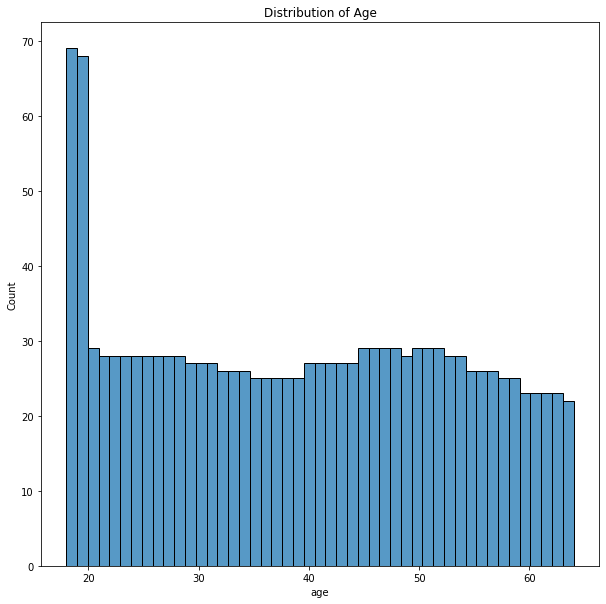

In [147]:
plt.figure(figsize=(10,10))

sns.histplot(data=data, x='age', bins=47)
plt.title("Distribution of Age")
plt.show()

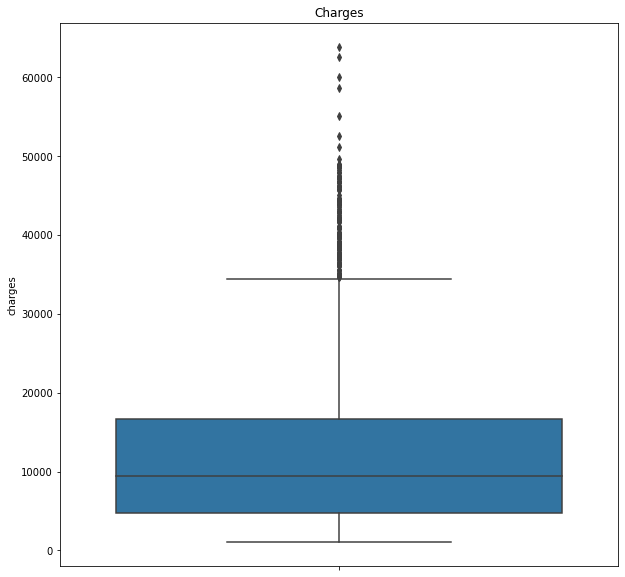

In [148]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='charges')

plt.title("Charges")
plt.show()

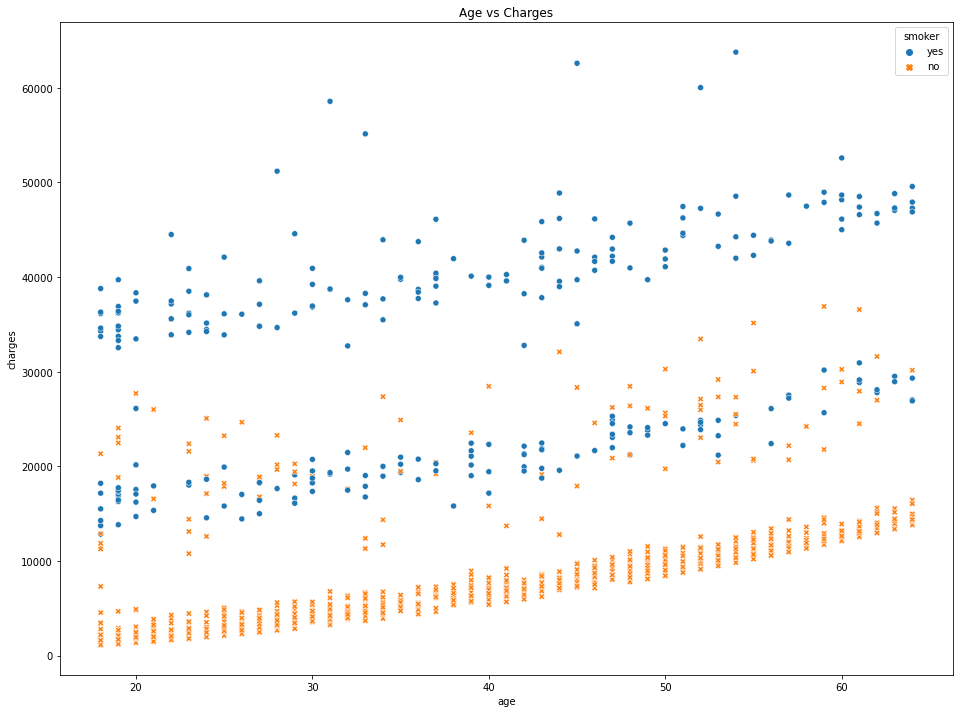

In [149]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', style='smoker')

plt.title("Age vs Charges")
plt.show()

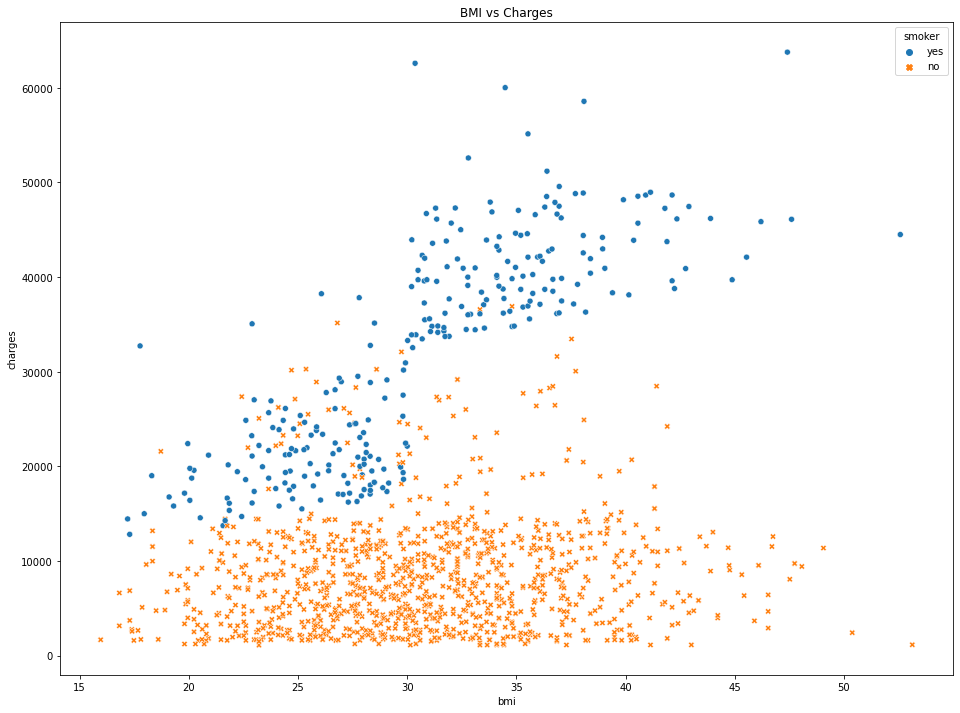

In [150]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', style='smoker')

plt.title("BMI vs Charges")
plt.show()

In [151]:
data.charges.corr(data.bmi)

0.19834096883362884

In [152]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


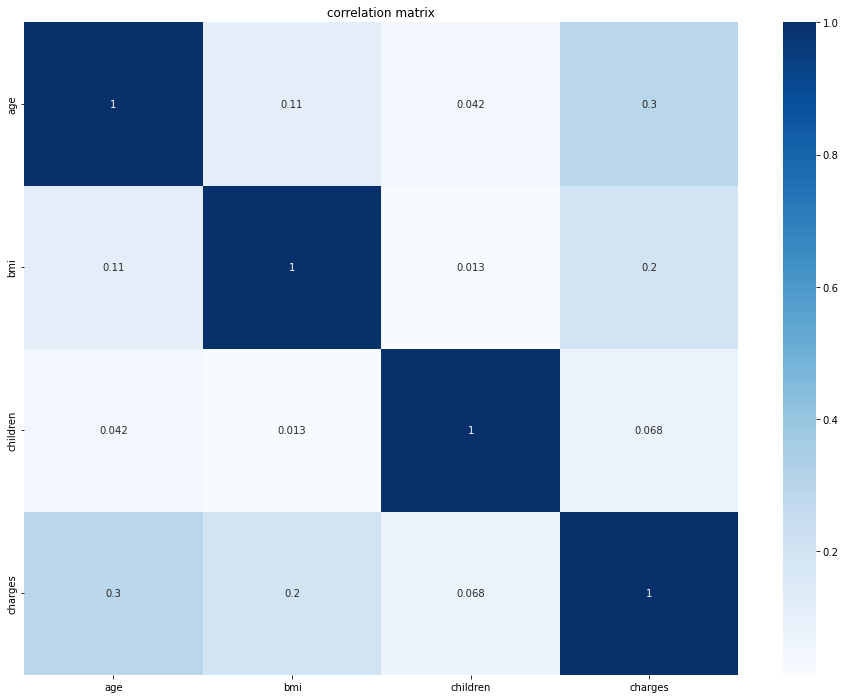

In [153]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(), annot=True, cmap='Blues')

plt.title("correlation matrix")
plt.show()

## Dataframe with non smokers

In [154]:
non_smoker_data = data[data.smoker=='no']
non_smoker_data

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


## Linear regression with one feature

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
model = LinearRegression()

In [157]:
inputs = non_smoker_data[['age']]
targets = non_smoker_data['charges']
print(inputs.shape, targets.shape)

(1064, 1) (1064,)


In [158]:
model.fit(inputs, targets)

LinearRegression()

## Calculating Root Mean Squared Error (RMSE)

In [159]:
import numpy as np
def rmse(actual, predict):
    return np.sqrt(np.mean(np.square(actual-predict)))

In [160]:
predictions = model.predict(inputs)

In [161]:
rmse(targets, predictions)

4662.505766636391

In [162]:
inputs = non_smoker_data[['age', 'bmi']]
inputs.shape

(1064, 2)

In [163]:
model.fit(inputs, targets)

LinearRegression()

In [164]:
predictions = model.predict(inputs)

In [165]:
rmse(targets, predictions)

4662.312835461297

In [166]:
print("Accuracy:",model.score(inputs, targets)*100,"%")

Accuracy: 39.43672876561962 %


#### Linear regression with only one feature fails to capture the whole picture, which was expected. We move on to creating a model with all features included.

## Encoding categorical values with mapping and one hot encoder

In [167]:
from sklearn import preprocessing
hot_encoder = preprocessing.OneHotEncoder()

In [168]:
hot_encoder.fit(data[['region']])
hot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [169]:
regions = hot_encoder.transform(data[['region']]).toarray()
regions

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [170]:
data[['northeast', 'northwest', 'southeast', 'southwest']] = regions

In [171]:
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0


In [172]:
smokers = {'no':0, 'yes':1}
data['smoker_code'] = data.smoker.map(smokers)
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0


In [173]:
gender = {'female':0, 'male':1}
data['sex_code'] = data.sex.map(gender)
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1


In [174]:
inputs2, targets = data[['age','bmi','children', 'smoker_code', 'northeast', 'northwest', 'southeast','southwest']], data.charges
model.fit(inputs2, targets)

LinearRegression()

In [175]:
predictions = model.predict(inputs2)
rmse(targets, predictions)

6042.033215394106

In [176]:
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1


## Scaling numerical columns

In [177]:
scaler = preprocessing.StandardScaler()
columns_to_scale = ['age', 'bmi', 'children']
scaler.fit(data[columns_to_scale])

StandardScaler()

In [178]:
scaled_columns = scaler.transform(data[columns_to_scale])
scaled_columns

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

## Inputs for model after scaling and encoding

In [179]:
encoded_columns = ['sex_code', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = data[encoded_columns].values
numerical_data = data[columns_to_scale].values

In [180]:
inputs2 = np.concatenate((categorical_data, numerical_data), axis=1)
targets = data.charges

In [181]:
model = LinearRegression()

In [182]:
model.fit(inputs2, targets)

LinearRegression()

In [183]:
predictions = model.predict(inputs2)

In [184]:
rmse(targets, predictions)

6041.679651174457

In [185]:
print("Accuracy:",model.score(inputs2, targets)*100,"%")

Accuracy: 75.09130345985207 %


#### Due to a high number of outliers in this dataset, we only achieve an accuracy of 75%, which can be improved further with optimisations